In [1]:
%matplotlib notebook  

In [2]:
import pickle 
from collections import defaultdict
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

In [3]:
import torch 
from psvi.experiments.experiments_utils import make_four_class_dataset

In [6]:
def rec_dd():
    return defaultdict(rec_dd)

In [4]:
! \
python3 ../experiments/flow_psvi.py \
--increment \
--increment_sizes 10 15 20 \
--increment_interval 401 \
--num_epochs 1201 \
--inner_it 100 \
--log_every 100 \
--lr0u 1e-4 \
--lr0v 1e-3 \
--lr0net 1e-4 \
--n_layers 1 \
--n_hidden 80 \
--datasets four_blobs \
--architecture fn \
--methods psvi_alpha_v \
--num_trials 1 \
--init_at subsample \
--init_sd 1e-4 \
--data_minibatch 128 \
--log_pseudodata \
--fnm incremental


Reading/Generating the dataset FOUR_BLOBS

Bayesian neural network experiment.
Inference via PSVI_ALPHA_V on four_blobs data over 1 trial.





Running psvi_alpha_v

Trial #0
Coreset/Subset with 10 datapoints
  0%|                                                  | 0/1201 [00:00<?, ?it/s]
logging predictive grid at 0
/Users/dionman/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

predictive accuracy: 95.65%
/Users/dionman/opt/anaconda3/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.

In [7]:
dnm, meth = 'four_blobs', 'psvi_alpha_v'

with open('../results/incremental.pk', 'rb') as f:
       results = pickle.load(f)

us, zs, vs, gpreds = (
        results[dnm][meth][100][0]['us'],
        results[dnm][meth][100][0]['zs'],
        results[dnm][meth][100][0]['vs'],
        results[dnm][meth][100][0]['grid_preds'],
)

<IPython.core.display.Javascript object>


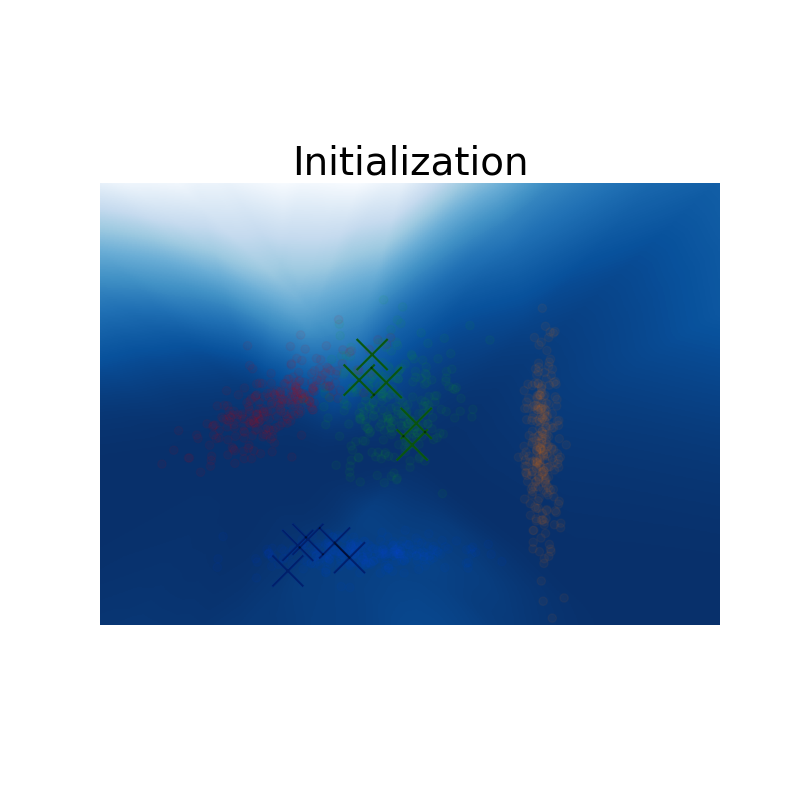

<IPython.core.display.Javascript object>


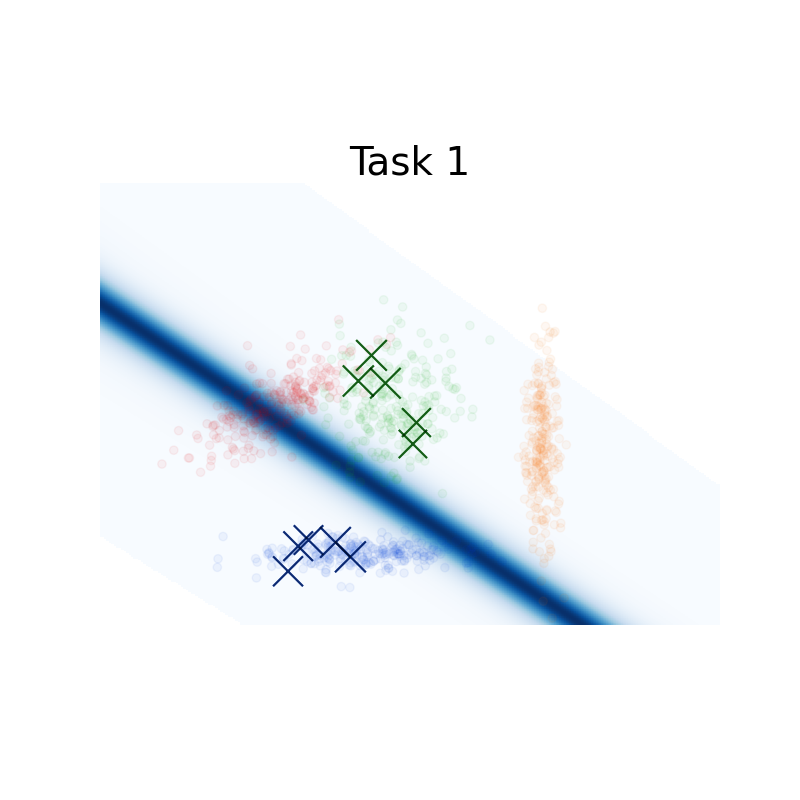

/var/folders/dk/gl79172n0f19_gjp_qv6qsw5p9ycx4/T/ipykernel_1406/2972736510.py:18: RuntimeWarning: divide by zero encountered in log
  return -p*np.log(p) - (1-p)*np.log(1-p)
/var/folders/dk/gl79172n0f19_gjp_qv6qsw5p9ycx4/T/ipykernel_1406/2972736510.py:18: RuntimeWarning: invalid value encountered in multiply
  return -p*np.log(p) - (1-p)*np.log(1-p)


<IPython.core.display.Javascript object>


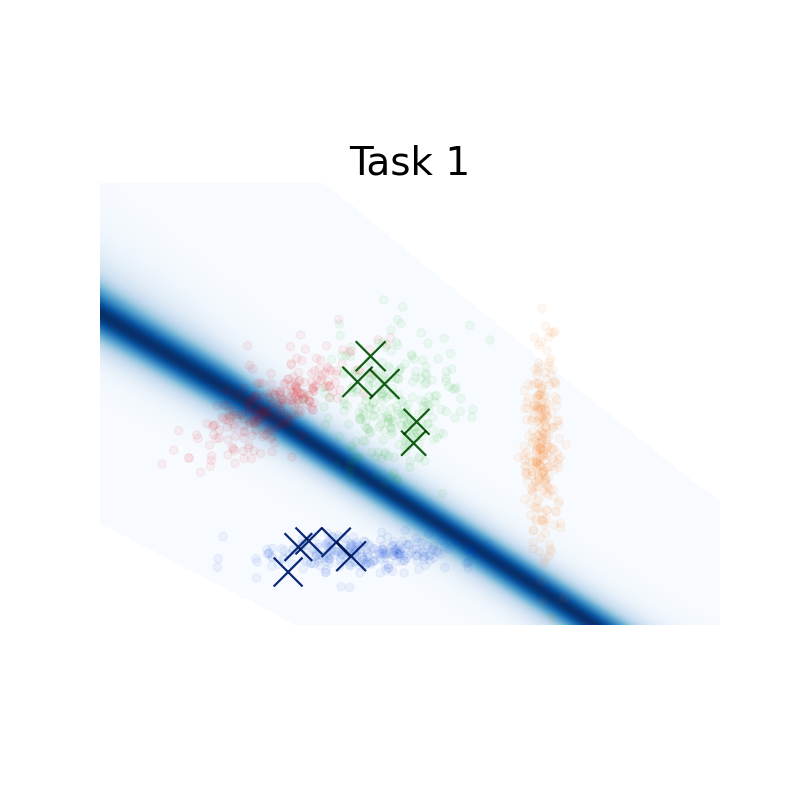

<IPython.core.display.Javascript object>


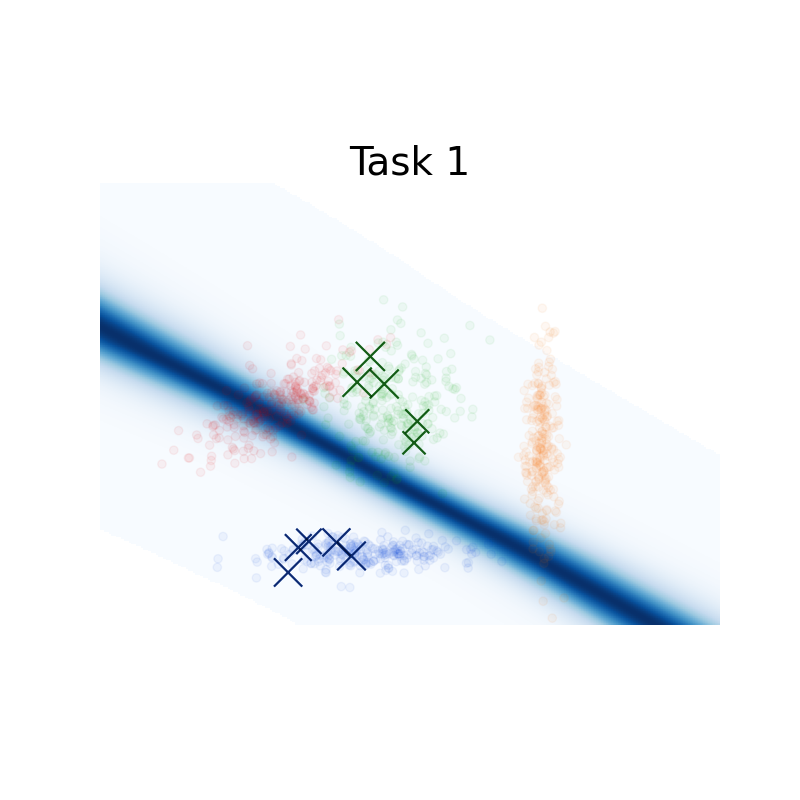

/var/folders/dk/gl79172n0f19_gjp_qv6qsw5p9ycx4/T/ipykernel_1406/2972736510.py:18: RuntimeWarning: invalid value encountered in log
  return -p*np.log(p) - (1-p)*np.log(1-p)


<IPython.core.display.Javascript object>


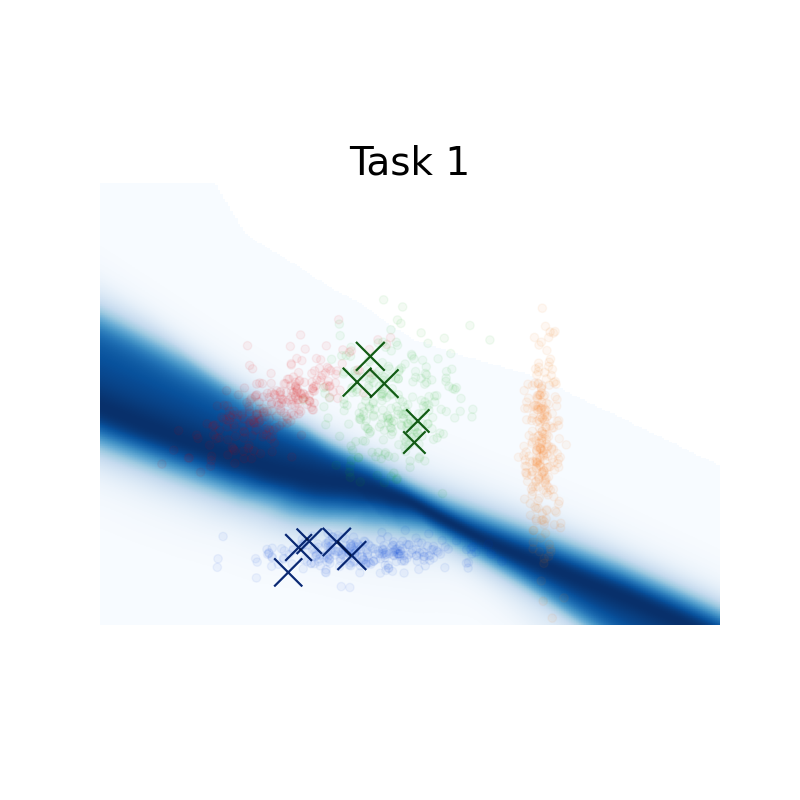

<IPython.core.display.Javascript object>


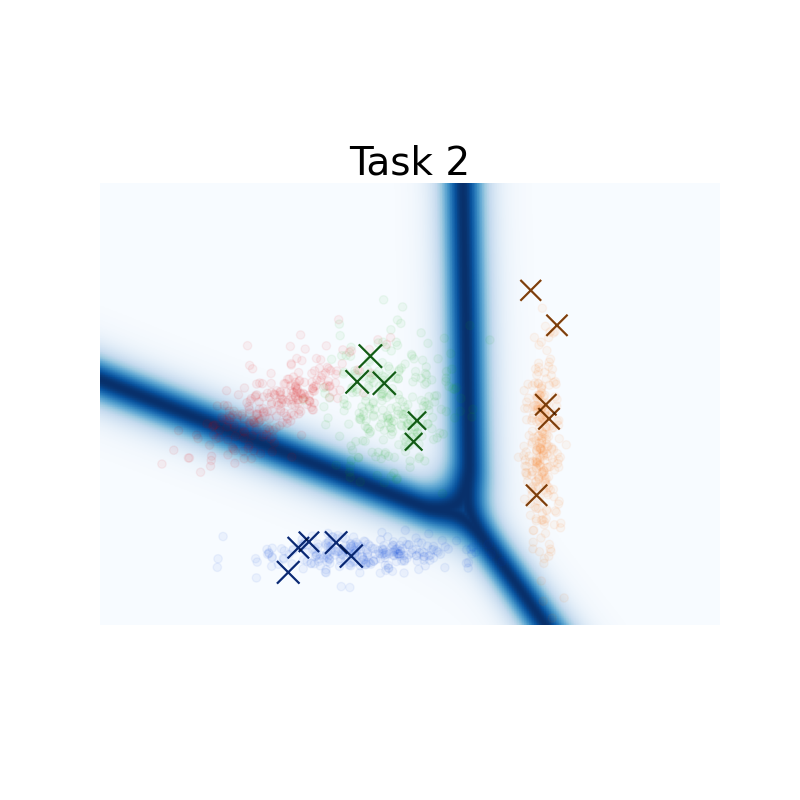

<IPython.core.display.Javascript object>


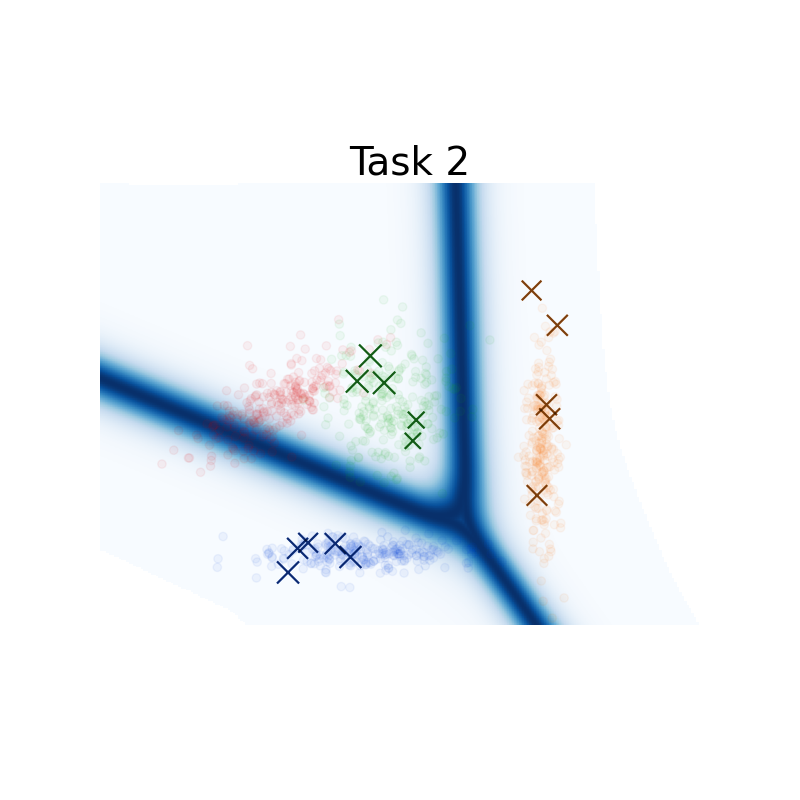

<IPython.core.display.Javascript object>


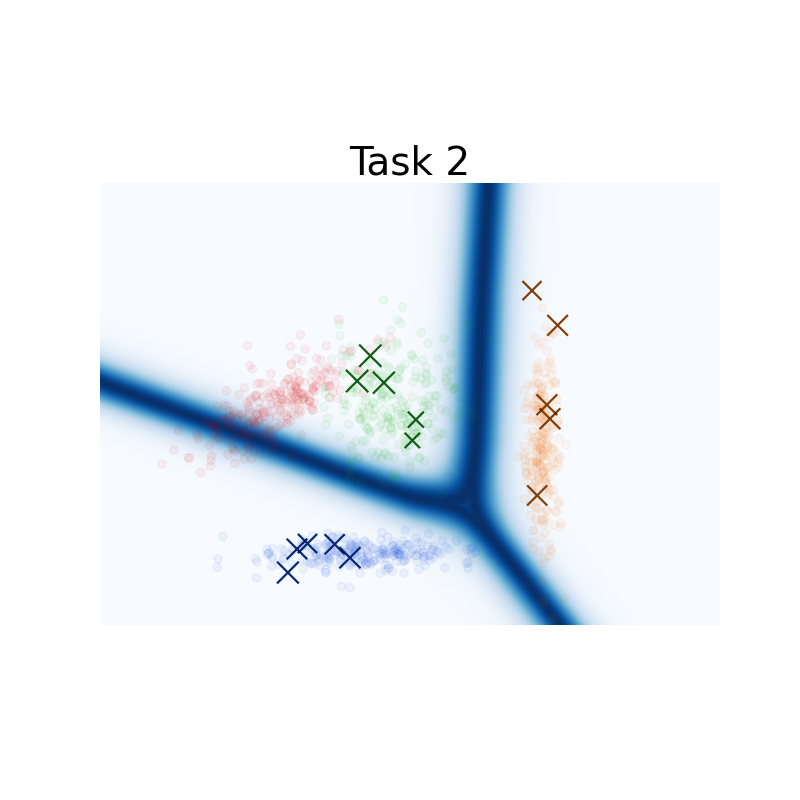

<IPython.core.display.Javascript object>


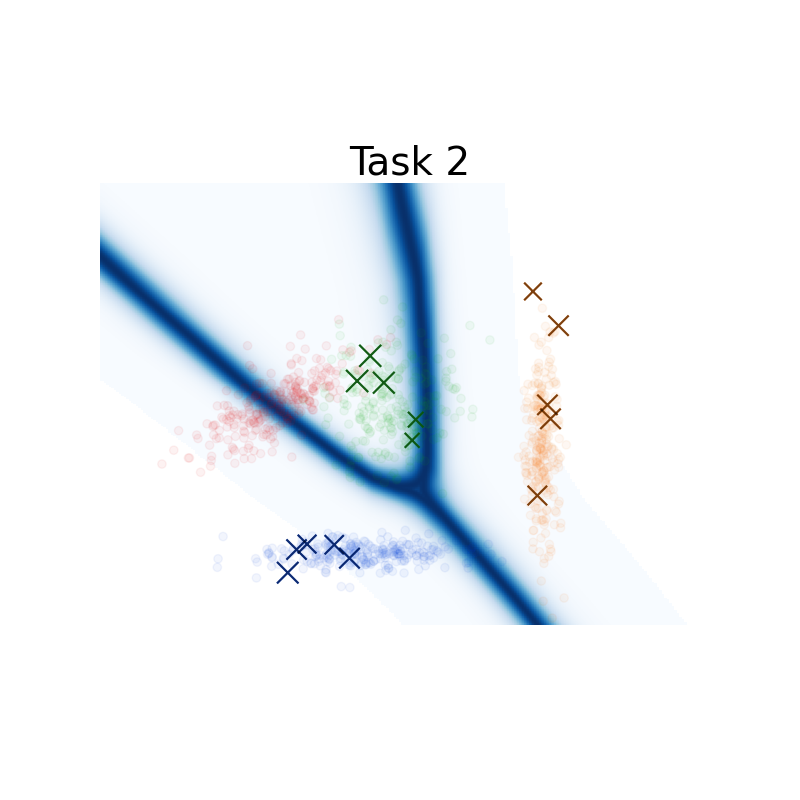

<IPython.core.display.Javascript object>


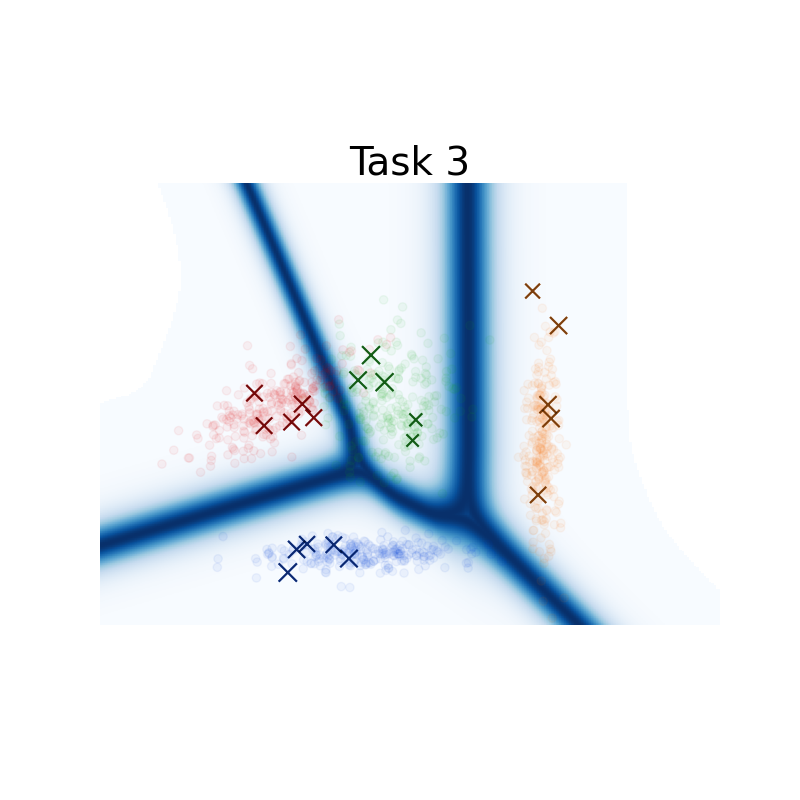

<IPython.core.display.Javascript object>


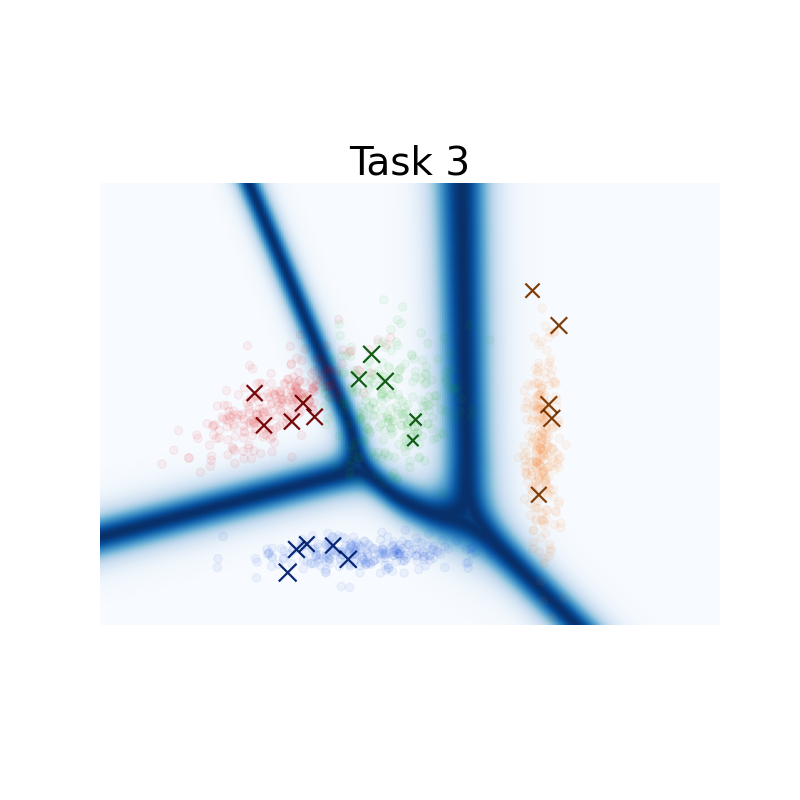

<IPython.core.display.Javascript object>


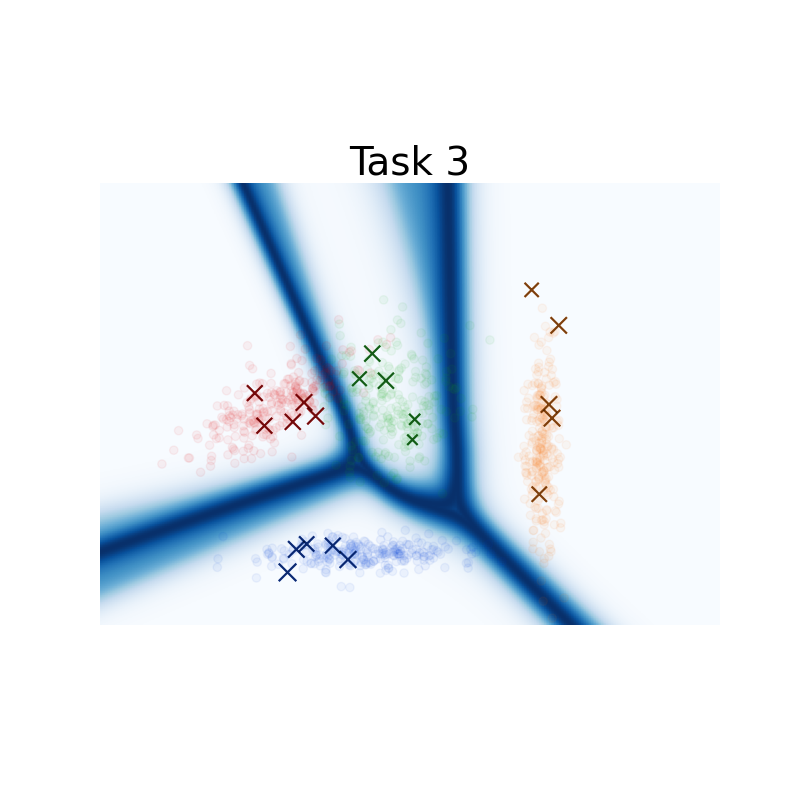

<IPython.core.display.Javascript object>


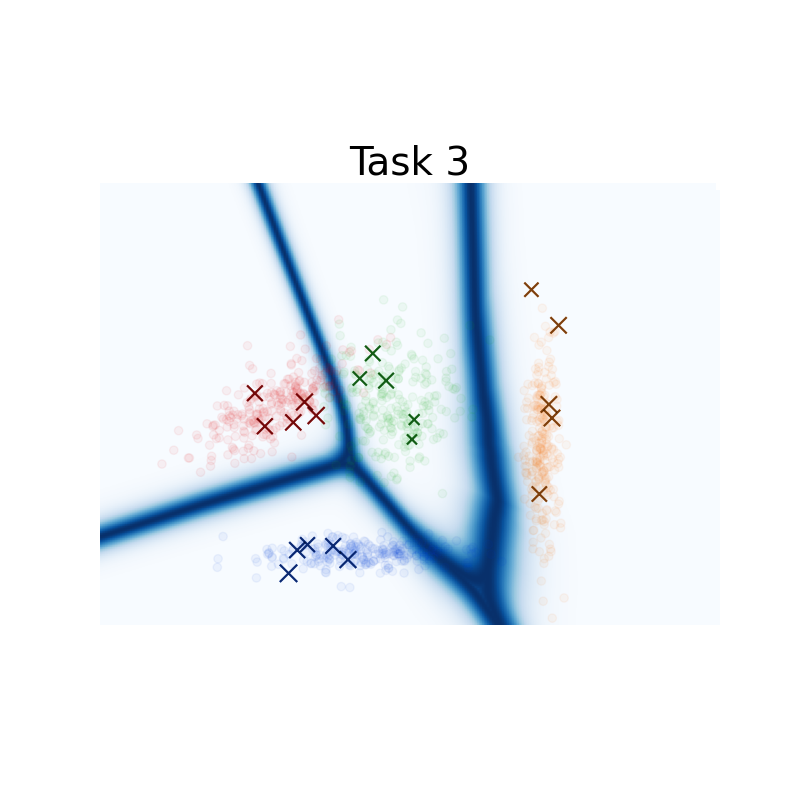

In [9]:
X, Y = make_four_class_dataset(N_K=250)

C1 = sns.xkcd_rgb["green"]
C2 = sns.xkcd_rgb["blue"]
C3 = sns.xkcd_rgb["orange"]
C4 = sns.xkcd_rgb["red"]
COLS = np.array([C1, C2, C3, C4])
UC1 = sns.xkcd_rgb["green"]
UC2 = sns.xkcd_rgb["blue"]
UC3 = sns.xkcd_rgb["orange"]
UC4 = sns.xkcd_rgb["red"]
UCOLS = np.array([UC1, UC2, UC3, UC4])
title_font = {'size':'28'}

def predictive_entropy(g):
    #p = g[0,...]
    p = np.max(g, axis=0)
    return -p*np.log(p) - (1-p)*np.log(1-p)

def plot_full(idx=0, a0=0.05, a1=0.9, ax=None, fnm=None, ttl=None):
    if ax is None:
        f, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.scatter(X[:, 0], X[:, 1], c=COLS[Y.squeeze().int().numpy()], alpha=a0)
    ax.scatter(us[idx][:, 0], us[idx][:, 1], c=UCOLS[torch.tensor(zs[idx]).squeeze().int().numpy()], alpha=a1, marker='x', s=5e3*vs[idx])
    ax.scatter(us[idx][:, 0], us[idx][:, 1], c='k', alpha=0.5, marker='x', s=5e3*vs[idx])
    ents = predictive_entropy(gpreds[idx]).reshape((250, 250)).T
    ax.imshow(ents, extent=(-3, 4, -2, 3), origin="lower", cmap='Blues')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.axis('off')
    plt.title(ttl,**title_font)
    f.savefig(fnm + ".png",
        format="png",
        bbox_inches="tight",
    )
    plt.show()


def titles(idx):
    if idx==0:
        return "Initialization"
    elif 1<=idx<=4:
        return "Task 1"
    elif 5<=idx<=8:
        return "Task 2"
    else:
        return "Task 3"
    
for idx in range(len(us)):
    plot_full(idx=idx, ttl=titles(idx), fnm=f"figs/incremental_learning_{idx}")
    

In [ ]:
!pip3 uninstall -y torch torchvision
!pip3 install torch torchvision

In [ ]:
import torch